# Tarea 3
## Búsqueda de máximo en secuencia unimodal

Se debe implementar un algoritmo que a través del método dividir para reinar halle el valor máximo de una secuencia unimodal,esto es, que tiene una sola moda o máximo global y que no tiene máximos locales. La secuencia consta de n números enteros,  es estrictamente ascendente hasta llegar al máximo, y a partir de ahí es estrictamente descendente.

El algoritmo está orientado a resolver el problema en un arreglo "a" que posee esta secuencia, que en un momento dado se sabe que el máximo se encuentra en el rango a[i], ..., a[j] (inicialmente i=0, j=n-1).Posteriormente se calculan dos subíndices k1, k2 tales que i<k1<k2<j y tal que los intervalos definidos por ellos sean aproximadamente del mismo tamaño. Luego se compara a[k1] con a[k2] y en base al resultado se puede descartar unos de los tres tercios y se sigue buscando en los dos tercios restantes.  

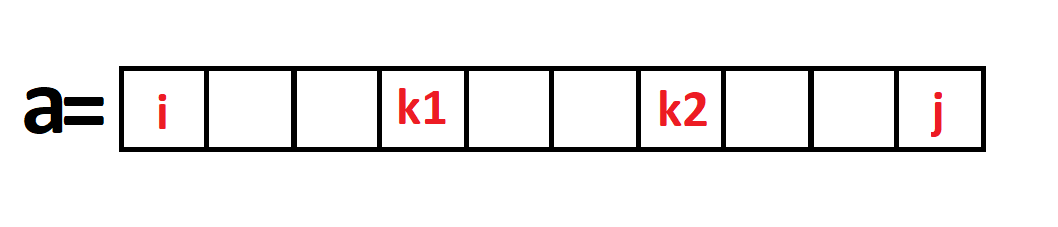

Para proceder a la resolución del problema inicialmente se verifica que este sea un arreglo no nulo y posteriormente se plantean los subíndices necesarios. El método de resolución es iterativo y debe detenerse una vez el subindice k1 coincida con k2, caso en el cual existen 3 candidatos a máximo; a[i],a[k1],a[j] momento en el que se deben comparar.
Dentro de la iteración hay 3 posibilidades; a[k1]<a[k2] , a[k1]>a[k2] o a[k1]=a[k2], las 2 primeras son análogas. Si 
a[k1]<a[k2] (a[k1]>a[k2]) quiere decir que en el tercio entre i y k1 (k2 y j) no existe la posibilidad de que esté presente el máximo global por como se define la secuencia, razón por la cual el subindice k1 (k2) pasa a ser el nuevo subindice i (j).
Ejemplificando con el caso a[k1]<a[k].

Solo era posible que los elementos anteriores al elemento a[k1] fueran estrictamente menores a este debido a la configuración del arreglo

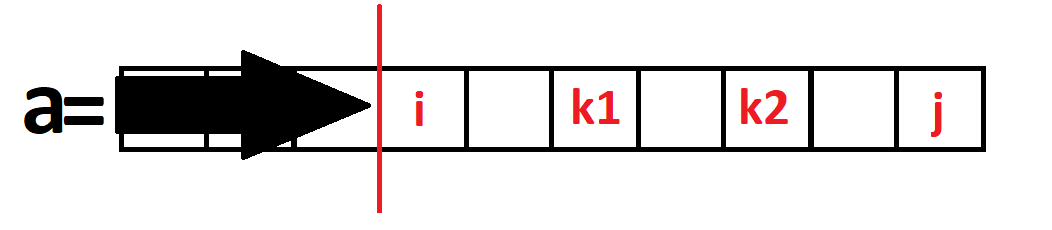

Posteriormente se vuelve a particionar el nuevo subconjunto con candidato a máximo en 3 partes iguales redefiniendo k1 y k2, como se ve en la imagen.
Al realizar la operación puede suceder por cómo se redefinen los subindices k1 y k2 que se genere un loop en las comparaciones, esto se soluciona analizando el caso en que k1 y k2 estén a 1 casillero de distancia, momento en que se comparan todos los elementos entre i y j y se retorna el máximo.
Falta explorar un caso; a[k1]=a[k2], si esto sucede, por como está definida la secuencia todo lo exterior al rango a[k1],a[k2] no es candidato a máximo, por ende se redefine i como k1 y j como k2, posteriormente se particiona el nuevo subconjunto y se redefinen los indices k1 y k2 para volver a iterar sobre el conjunto.


## código

In [1]:
import numpy as np
import math

def moda(a):
    assert a[0]!= None
    i=0
    j=len(a)-1
    k1=len(a)//3
    #k2=i+2*(j-i)//3  # otra forma de plantear k2
    k2=j-len(a)//3
    while k1!=k2:
        if a[k1]<a[k2]:
            i=k1
            k1=i+(j+1-i)//3 #k1 aprox a un tercio de distancia de i
            k2=j-(j+1-i)//3 #k2 aprox a 2 tercios de distancia de i
            if k2-k1==1:
                m=-math.inf
                for x in range(i,j+1):
                    m = max(m,a[x])
                return m
            
            
        elif a[k1]>a[k2]:
            j=k2
            k1=i+(j+1-i)//3 #k1 aprox a un tercio de distancia de i
            k2=j-(j+1-i)//3 #k2 aprox a 2 tercios de distancia de i
            if k2-k1==1:
                m=-math.inf
                for x in range(i,j+1):
                    m = max(m,a[x])
                return m
        else:
            i=k1
            j=k2
            k1=i+(j+1-i)//3
            k2=j-(j+1-i)//3
    if a[k1]<a[j]:
        return a[j]
    if a[k1]<a[i]:
        return a[i]
    return a[k1]



Posterior a la realización del código se prueba con una variedad de tests, en primera instancia se aplican los pedidos para realizar la experiencia, siendo estos desde test1 a test6 que prueban los casos base, el caso en que se puede llegar a un loop y casos en que el máximo se ubica a un extremo.

In [ ]:
test1=np.array([12, 18, 23, 31, 37, 62, 78, 71, 60, 55, 43, 40, 35, 31, 26, 21, 20, 15 ]) 
test2=np.array([10, 74, 56, 22]) 
test3=np.array([12, 45, 20]) 
test4=np.array([23, 76]) 
test5=np.array([42]) 
test6=np.array([10, 9, 8, 7, 6, 5, 4, 3, 2, 1]) 
test7=np.array([1,2,3,4,5,6,7,8,9,10])
fenalindapreciosa=np.array([10,9,8,7,6])


assert (moda(test1)==78)
assert (moda(test2)==74)
assert (moda(test3)==45)
assert (moda(test4)==76)
assert (moda(test5)==42)
assert (moda(test6)==10)
assert (moda(test7)==10)
assert (moda(fenalindapreciosa)==10)

Posteriormente se crea una función auxiliar que genera una lista con números en orden ascendente (se trabajan igual que un arreglo, con la diferencia que las listas pueden ser modificadas lo que hace que su análisis para busqueda de elementos no sean recorridas en tiempo constante, razón por la cual se utilizan solo para verificar la funcionalidad del código)

In [ ]:
for i in range(1,10):
    assert (moda(range(i))==i-1)

def crearlista(n):#funcion auxiliar para crear listas
    L=[]
    for i in range(5,n):
        L.append(i)
    return L

for i in range (10,30):
    L=crearlista(i)+[8,7,6,5,4,3,2,1]
    L2=crearlista(i)+[5,4,3,2,1]
    L3=crearlista(i)+[1]
    assert (moda(L)==i-1)
    assert (moda(L2)==i-1)
    assert (moda(L3)==i-1)

Analizando este algoritmo en función del largo del arreglo (n), su ecuación de recurrencia para el tiempo T(n) que demora el algoritmo en el peor caso debiese ser de la forma:
T(n)=T(2n/3)+1.

Utilizando el teorema maestro tenemos el caso que p=1 r=0 y q=3/2, por lo que al comparar se tiene $p=q^r$lo que implica que el orden de tiempo está dado por $\Theta(n^r \log{n})$, reemplazando los valores: $T(n)=\Theta(\log{n})$